# Plots of optimizer and activation function experiments
The first few sections store the results into dataframe and define functions for the plotting.  
The last few sections show the plots.  
The plots across validation scores look like scribbles when viewed on a small screen.

In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

### Store results into pandas dataframe

In [3]:
# Generate empty pandas dataframes to hold results
optim_df_acc = pd.DataFrame()
optim_df_losses = pd.DataFrame()
af_df_acc = pd.DataFrame()
af_df_losses = pd.DataFrame()

# Generate list of strings for optim and af results
optim_list = ["Adam", "SGD", "RMSProp"]
af_list = ["ReLU", "SELU", "ELU", "LReLU", "Sigmoid", "Softplus"]

# Add optimizer accuracies to dataframe
for i in optim_list:
    with open(f"res18_{i}_accs.txt", "r") as f:
        stats = f.read()
    stats = stats.split("\n")[0:-1]
    train = [float(stats[i]) for i in range(0, len(stats), 2)]
    val = [float(stats[i]) for i in range(1, len(stats), 2)]
    optim_df_acc[f"{i}_train"] = train
    optim_df_acc[f"{i}_val"] = val

# Add optimizer losses to dataframe
for i in optim_list:
    with open(f"res18_{i}_losses.txt", "r") as f:
        stats = f.read()
    stats = stats.split("\n")[0:-1]
    train = [float(stats[i]) for i in range(0, len(stats), 2)]
    val = [float(stats[i]) for i in range(1, len(stats), 2)]
    optim_df_losses[f"{i}_train"] = train
    optim_df_losses[f"{i}_val"] = val

# Add activation function accuracies to dataframe
for i in af_list:
    with open(f"res18_{i}_accs.txt", "r") as f:
        stats = f.read()
    stats = stats.split("\n")[0:-1]
    train = [float(stats[i]) for i in range(0, len(stats), 2)]
    val = [float(stats[i]) for i in range(1, len(stats), 2)]
    af_df_acc[f"{i}_train"] = train
    af_df_acc[f"{i}_val"] = val

# Add activation function losses to dataframe
for i in af_list:
    with open(f"res18_{i}_losses.txt", "r") as f:
        stats = f.read()
    stats = stats.split("\n")[0:-1]
    train = [float(stats[i]) for i in range(0, len(stats), 2)]
    val = [float(stats[i]) for i in range(1, len(stats), 2)]
    af_df_losses[f"{i}_train"] = train
    af_df_losses[f"{i}_val"] = val

In [22]:
for i in optim_list:
    print(i)
    print("avg loss:", optim_df_losses[f"{i}_val"].mean())
    print("min loss:", optim_df_losses[f"{i}_val"].min())
    print("avg acc:", optim_df_acc[f"{i}_val"].mean())
    print("max acc:", optim_df_acc[f"{i}_val"].max())

Adam
avg loss: 1.3745075883171916
min loss: 0.8740457310494936
avg acc: 0.765104979004199
max acc: 0.8044391121775645
SGD
avg loss: 0.4703397651800501
min loss: 0.4022478901238662
avg acc: 0.8556778644271145
max acc: 0.8785242951409717
RMSProp
avg loss: 2.2036482006547957
min loss: 1.0316319582915692
avg acc: 0.6663137372525495
max acc: 0.7366526694661067


In [23]:
for i in af_list:
    print(i)
    print("avg loss:", af_df_losses[f"{i}_val"].mean())
    print("min loss:", af_df_losses[f"{i}_val"].min())
    print("avg acc:", af_df_acc[f"{i}_val"].mean())
    print("max acc:", af_df_acc[f"{i}_val"].max())

ReLU
avg loss: 1.568184502725838
min loss: 1.2227302930565316
avg acc: 0.48123275344931005
max acc: 0.5932813437312537
SELU
avg loss: 1.7019690504275042
min loss: 1.3598275995569167
avg acc: 0.4727474505098981
max acc: 0.5887822435512897
ELU
avg loss: 1.5690235881586951
min loss: 1.1827604045536109
avg acc: 0.5011967606478703
max acc: 0.6232753449310138
LReLU
avg loss: 1.5808083083628535
min loss: 1.2947309790218242
avg acc: 0.48246550689862017
max acc: 0.5914817036592681
Sigmoid
avg loss: 2.279622338045552
min loss: 1.74190510420579
avg acc: 0.2576754649070186
max acc: 0.3917216556688662
Softplus
avg loss: 1.6766440886763234
min loss: 1.2537928009791222
avg acc: 0.46244751049790034
max acc: 0.5911817636472705


In [ ]:
# Max acc optimizer
for i in optim

### Plotting functions

In [3]:
def plot_single_result(prop: str, values: str, df):
    '''
    First argument: string of optimizer or activation function
    Second argument: string; accuracy or losses
    Third argument: corresponding dataframe (e.g. optim_df_acc)
    '''
    # Grab the results
    results = df[[f"{prop}_train", f"{prop}_val"]]
    results = results.reset_index()

    # Plot the results
    plt.plot(results["index"], results[f"{prop}_train"])
    plt.plot(results["index"], results[f"{prop}_val"])
    plt.xlabel("Epochs")
    plt.ylabel(f"{values}")
    plt.title(f"Resnet18 with {prop}")
    plt.show()

In [4]:
def plot_optim_vals(values: str, df):
    # Grab the results
    results = df[["SGD_val", "Adam_val", "RMSProp_val"]]
    results = results.reset_index()

    # Plot the results
    plt.plot(results["index"], results["SGD_val"])
    plt.plot(results["index"], results["Adam_val"])
    plt.plot(results["index"], results["RMSProp_val"])
    plt.xlabel("Epochs")
    plt.ylabel(f"{values}")
    plt.title(f"Resnet18 {values} of different optimizers)")
    plt.legend(["SGD", "Adam", "RMSProp"])
    plt.show()

In [17]:
def plot_af_vals(values: str, df):
    # Grab the results
    results = df[["ReLU_val", "SELU_val", "ELU_val", "LReLU_val", "Sigmoid_val", "Softplus_val"]]
    results = results.reset_index()

    # Plot the results
    plt.plot(results["index"], results["ReLU_val"])
    plt.plot(results["index"], results["SELU_val"])
    plt.plot(results["index"], results["ELU_val"])
    plt.plot(results["index"], results["LReLU_val"])
    plt.plot(results["index"], results["Sigmoid_val"])
    plt.plot(results["index"], results["Softplus_val"])
    plt.xlabel("Epochs")
    plt.ylabel(f"{values}")
    plt.title(f"Resnet18 {values} of different activation functions")
    plt.legend(af_list)
    plt.show()

# The plots

### Validation Scores of optimizer experiments

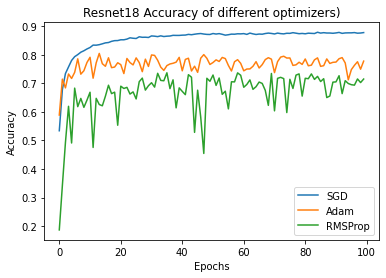

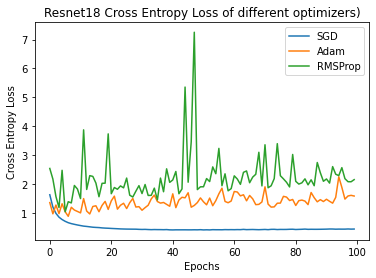

In [85]:
plot_optim_vals("Accuracy", optim_df_acc)
plot_optim_vals("Cross Entropy Loss", optim_df_losses)

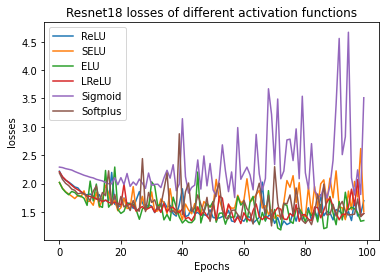

In [18]:
plot_af_vals("losses", af_df_losses)

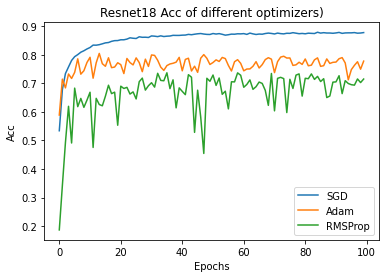

In [79]:
plot_optim_vals("Acc", optim_df_acc)

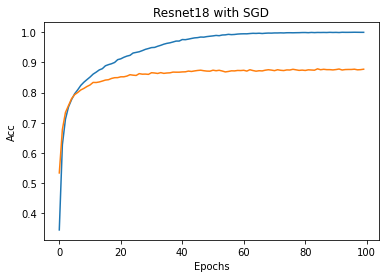

In [72]:
plot_single_result("SGD", "Acc", optim_df_acc)

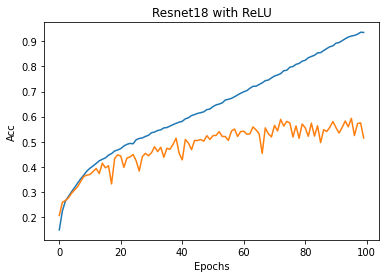

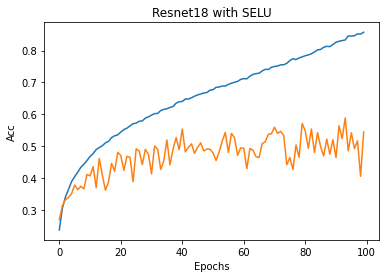

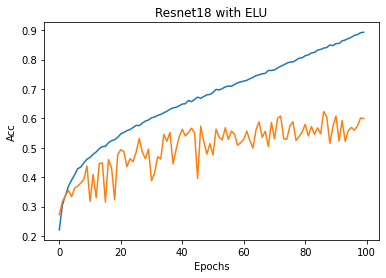

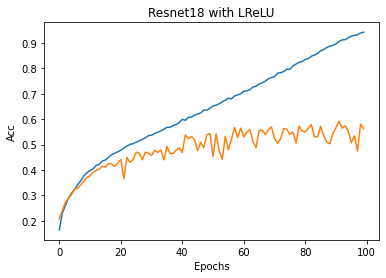

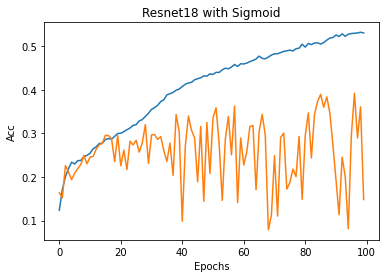

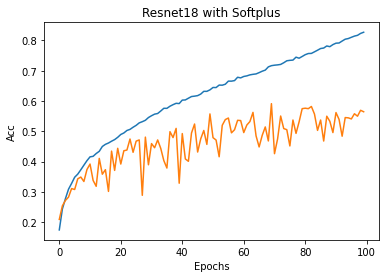

In [71]:
for i in af_list:
    plot_single_result(i, "Acc", af_df_acc)